In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [71]:
df = pd.read_csv(r"C:\Users\diego\Projeto 3\MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

print(df.columns)

Index(['title', 'Marca', 'Preco_Normal', 'Preco_Desconto', 'Preco_Anterior',
       'Desconto', 'Categoria'],
      dtype='object')


In [73]:
# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.

# Calcula quantidade de categorias de produtos
quantidade_de_categorias = len(df['Categoria'])

print("Quantidade de categorias é: \n", quantidade_de_categorias)

# Calcula a média dos preços por categoria
media_preco_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().round(2)  #round(2) limita os valores para apenas duas casas após o ponto.

print("Média de preços por categoria: \n", media_preco_por_categoria)

# Calcula a mediana dos preços por categoria
mediana_preco_por_categoria = df.groupby('Categoria')['Preco_Normal'].median().round(2)

print("Mediana de preços por categoria: \n", mediana_preco_por_categoria)

Quantidade de categorias é: 
 1107
Média de preços por categoria: 
 Categoria
belleza-y-cuidado-personal    1783.56
comidas-preparadas            3095.04
congelados                    2108.04
frutas                        1724.47
instantaneos-y-sopas           765.49
lacteos                       2385.22
verduras                      1343.30
Name: Preco_Normal, dtype: float64
Mediana de preços por categoria: 
 Categoria
belleza-y-cuidado-personal    1569.0
comidas-preparadas            3290.0
congelados                    1519.0
frutas                        1195.0
instantaneos-y-sopas           439.0
lacteos                        989.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64


In [75]:
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

# Identifica o desvio padrão de cada categoria
desvio_padrao_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().round(2)
desvio_padrao_categoria = desvio_padrao_categoria.rename(columns={'Preco_Normal': 'Desvio_Padrao'})

print("Desvio padrão por categoria de produto:\n", desvio_padrao_categoria)

# Ordena comportamento da média e mediana nas categorias com maior desvio
categorias_maior_desvio = desvio_padrao_categoria.sort_values(by='Desvio_Padrao', ascending=False)

print("Categorias com maior desvio padrão:\n", categorias_maior_desvio.head())


Desvio padrão por categoria de produto:
                     Categoria  Desvio_Padrao
0  belleza-y-cuidado-personal        2210.04
1          comidas-preparadas        2019.91
2                  congelados        2111.54
3                      frutas        1639.15
4        instantaneos-y-sopas        1170.23
5                     lacteos        3925.82
6                    verduras        1012.70
Categorias com maior desvio padrão:
                     Categoria  Desvio_Padrao
5                     lacteos        3925.82
0  belleza-y-cuidado-personal        2210.04
2                  congelados        2111.54
1          comidas-preparadas        2019.91
3                      frutas        1639.15


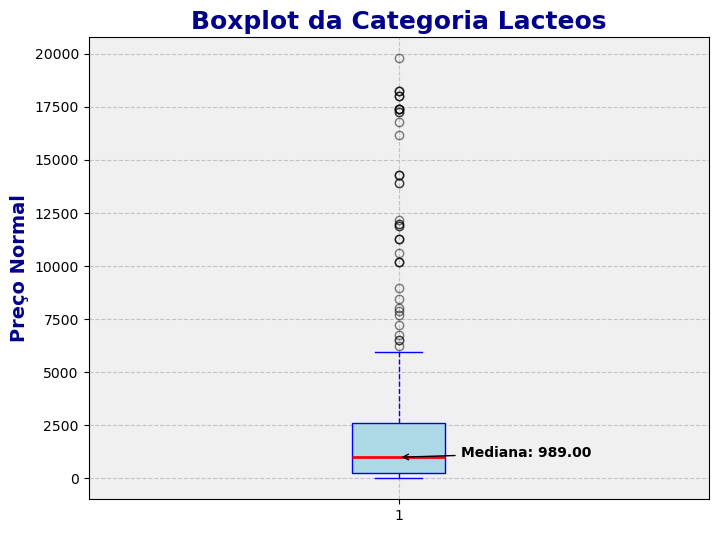

In [111]:
# Filtra categoria para apenas lacteos
dados_lacteos = df[df['Categoria'] == 'lacteos']['Preco_Normal']

# Criando gráfico Boxplot para categoria 'lacteos'
plt.figure(figsize=(8, 6))
plt.boxplot(dados_lacteos, vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='blue', linestyle='--'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='red', alpha=0.5))

# Fundo personalizado
plt.gca().set_facecolor('#f0f0f0')

# Legendas e rótulos
plt.title('Boxplot da Categoria Lacteos', fontsize=18, fontweight='bold', color='darkblue')
plt.ylabel('Preço Normal', fontsize=14, fontweight='bold', color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)

# Anotação da Mediana
median = dados_lacteos.median()
plt.annotate(f'Mediana: {median:.2f}', xy=(1, median), xytext=(1.1, median),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10, fontweight='bold', color='black')
plt.show()

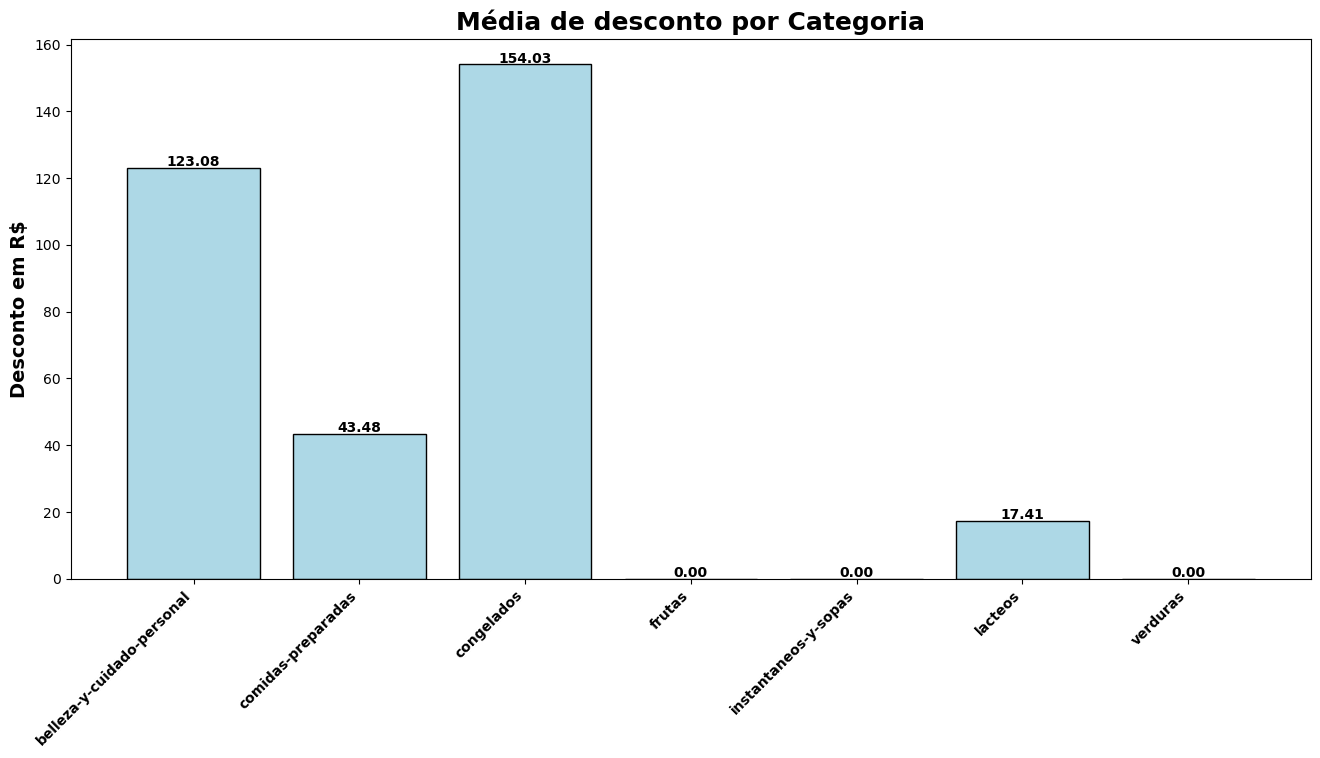

In [103]:
# Filtra média de desconto por categoria
desconto_media_categoria = df.groupby('Categoria')['Desconto'].mean()

# Criando gráfico de barras com média de desconto por categoria
plt.figure(figsize=(16, 9))

plt.bar(desconto_media_categoria.index, desconto_media_categoria, color='lightblue', edgecolor='black')
plt.title('Média de desconto por Categoria', fontsize=18, fontweight='bold')
plt.ylabel('Desconto em R$', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')

# Adicionar rótulos de valor em cima de cada barra
for index, value in enumerate(desconto_media_categoria):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10, fontweight='bold', color='black')
    
plt.subplots_adjust(bottom=0.3, top=0.9)
plt.show()

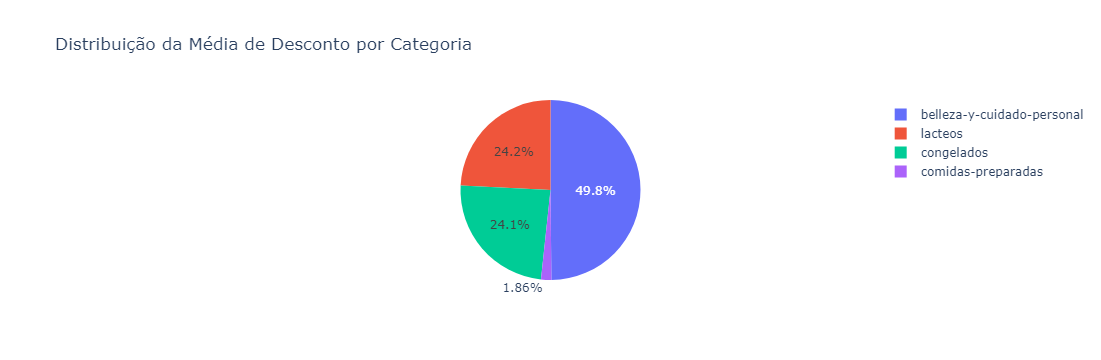

In [153]:
# Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto

# Filtrar o DataFrame para remover valores de desconto iguais a 0
df_filtrado = df[df['Desconto'] != 0]

# Agrupar dados por categoria e marca e calcular a média de desconto
df_agrupado = df_filtrado.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()
df_agrupado.rename(columns={'Desconto': 'Desconto_Medio'}, inplace=True)

# Criação do gráfico de pizza
fig = px.pie(
    df_agrupado, values='Desconto_Medio', names='Categoria',
             title='Distribuição da Média de Desconto por Categoria',
hover_data={'Desconto_Medio': ':.2f'}
)

fig.show()